In [4]:
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d rohan0301/unsupervised-learning-on-country-data --force

  0% 0.00/5.21k [00:00<?, ?B/s]
100% 5.21k/5.21k [00:00<00:00, 4.62MB/s]


In [7]:
!unzip /content/unsupervised-learning-on-country-data.zip

Archive:  /content/unsupervised-learning-on-country-data.zip
  inflating: Country-data.csv        
  inflating: data-dictionary.csv     


In [68]:
# importing the necessary library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [48]:
# reading the data
data = pd.read_csv('/content/Country-data.csv')
df = pd.read_csv('/content/Country-data.csv')
# df = 

In [62]:
# dropping the column
df.drop(columns = 'health',inplace= True)

In [49]:
# first 5 rows of the dataset
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


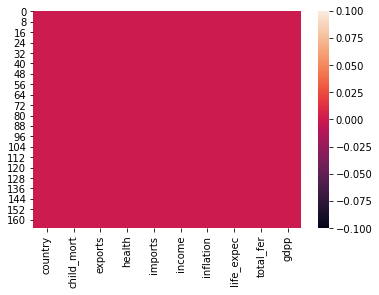

In [50]:
# check for the null values
sns.heatmap(data.isnull())

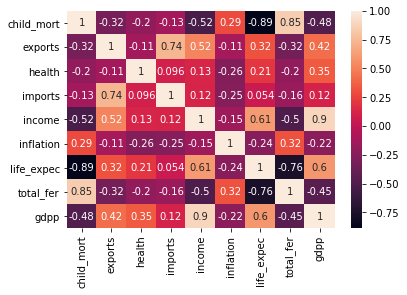

In [51]:
# looking for the realtions of columns with each other
sns.heatmap(data.corr(),annot = True)

In [52]:
# dropping the column
data.drop(columns = 'health',inplace=True)

In [53]:
# dropping the column
data.drop(columns = 'country',inplace=True)

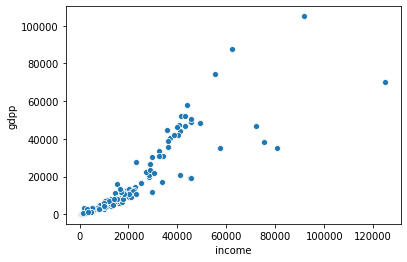

In [54]:
# seeing the income and gdp distribution
sns.scatterplot(x = 'income',y = 'gdpp',data=data)

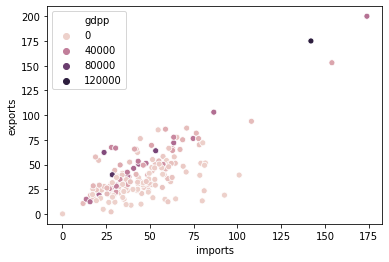

In [55]:
#  seeing how import and exports are related to gdp
sns.scatterplot(x = 'imports',y = 'exports',hue = 'gdpp',data=data)

In [102]:

# data[data['gdpp'].max()]

IndexError: ignored

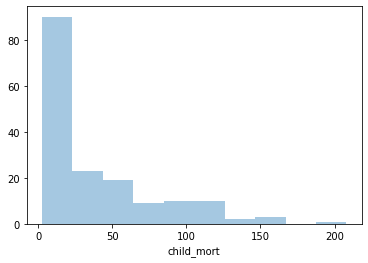

In [56]:
# histrogram based on the child mortalitry rate per 1000 capita
sns.distplot(data['child_mort'],bins = 10,kde= False)

In [57]:
data.describe()

,child_mort,exports,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [58]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
# to scale the data
scalar = MinMaxScaler()
data = scalar.fit_transform(data)

In [64]:
df = pd.DataFrame(data = data,columns=df.columns[1:])

In [65]:
df.head()

,child_mort,exports,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


In [67]:
df.describe()

,child_mort,exports,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,0.173661,0.205112,0.269207,0.132933,0.110820,0.758495,0.283591,0.121536
std,0.196343,0.137135,0.139188,0.154980,0.097687,0.175408,0.238777,0.174944
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.027507,0.118520,0.173250,0.022076,0.055633,0.654832,0.101735,0.010490
50%,0.081305,0.174550,0.248566,0.075174,0.088716,0.808679,0.198738,0.042274
75%,0.289679,0.256345,0.337393,0.178397,0.138250,0.881657,0.430599,0.131900
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
# to optimize the kmeans algoritm
clf = KMeans()
# Calculate sum of squared distances
ssd = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data)
    ssd.append(km.inertia_) 

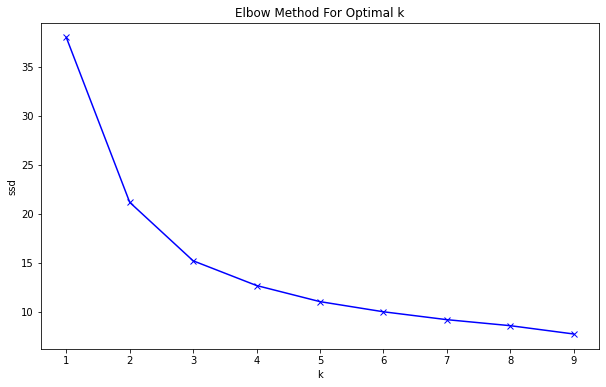

In [71]:
plt.figure(figsize=(10,6))
plt.plot(K, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('ssd')
plt.title('Elbow Method For Optimal k')
plt.show()

In [79]:
# dividing the the dataset into clusters of 5
kmean = KMeans(n_clusters=5)
kmean.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [80]:
# distributed labels
pred = kmean.labels_
print(pred)

[2 4 0 2 4 4 4 3 3 4 4 4 0 4 4 3 0 2 0 0 4 0 4 3 4 2 2 0 2 3 0 2 2 4 4 4 2
 2 2 4 2 4 3 4 3 0 4 0 4 2 2 4 0 3 3 0 2 4 3 2 4 4 0 2 2 0 2 4 3 0 0 4 0 3
 3 3 4 3 0 0 2 0 3 0 0 4 4 2 2 4 4 1 4 2 2 4 4 2 1 2 4 0 4 0 4 0 2 0 0 0 3
 3 2 2 3 4 2 4 0 4 0 4 4 3 4 4 2 0 4 2 4 4 2 1 4 4 0 0 4 3 4 4 2 0 3 3 0 2
 4 2 2 0 4 4 0 2 4 3 3 3 4 0 0 4 4 2 2]


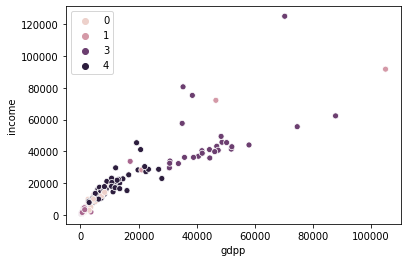

In [81]:
# gdp and income based on the clusters
sns.scatterplot(data= df1,x = 'gdpp',y = 'income',hue=kmean.labels_)

In [77]:
df1 = pd.read_csv('/content/Country-data.csv')

In [100]:
# list of countries which require utmost need for the money based on the income less than 1000 noticed from the above diagram
df1['country'][df1['income']<1000]

26                      Burundi
31     Central African Republic
37             Congo, Dem. Rep.
88                      Liberia
106                  Mozambique
112                       Niger
Name: country, dtype: object

In [85]:
max(df['income'])

1.0